In [1]:
import pandas as pd

df = pd.read_csv('/content/Iris.csv')
print("Iris dataset loaded successfully. First 5 rows:")
print(df.head())

Iris dataset loaded successfully. First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [2]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

print("Features (X) separated. First 5 rows:")
print(X.head())
print("\nTarget (y) separated. First 5 rows:")
print(y.head())

Features (X) separated. First 5 rows:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

Target (y) separated. First 5 rows:
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features (X) scaled using StandardScaler. First 5 rows of X_scaled:")
print(X_scaled[:5])

Features (X) scaled using StandardScaler. First 5 rows of X_scaled:
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracies = []
k_range = range(1, 16)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"K = {k}, Accuracy = {accuracy:.4f}")

print("\nAccuracies for K values 1 to 15:")
print(accuracies)

K = 1, Accuracy = 0.9778
K = 2, Accuracy = 0.9778
K = 3, Accuracy = 1.0000
K = 4, Accuracy = 0.9778
K = 5, Accuracy = 1.0000
K = 6, Accuracy = 1.0000
K = 7, Accuracy = 1.0000
K = 8, Accuracy = 1.0000
K = 9, Accuracy = 1.0000
K = 10, Accuracy = 1.0000
K = 11, Accuracy = 1.0000
K = 12, Accuracy = 1.0000
K = 13, Accuracy = 1.0000
K = 14, Accuracy = 1.0000
K = 15, Accuracy = 1.0000

Accuracies for K values 1 to 15:
[0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Optimal K value: 3
Accuracy with optimal K (3): 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



<Figure size 800x600 with 0 Axes>

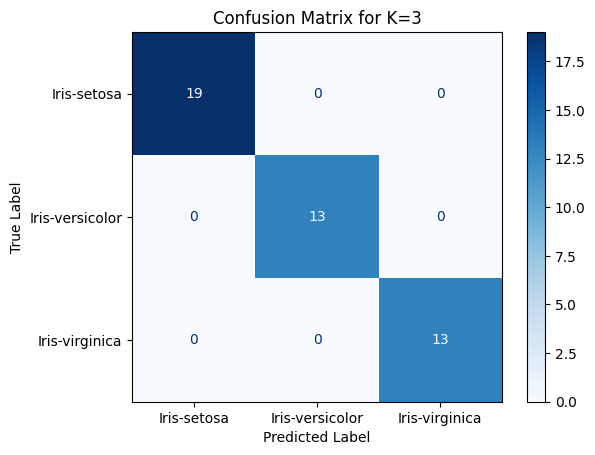

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
optimal_k = 3
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Optimal K value: {optimal_k}")
print(f"Accuracy with optimal K ({optimal_k}): {accuracy_optimal:.4f}")
cm = confusion_matrix(y_test, y_pred_optimal)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_optimal.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for K={optimal_k}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


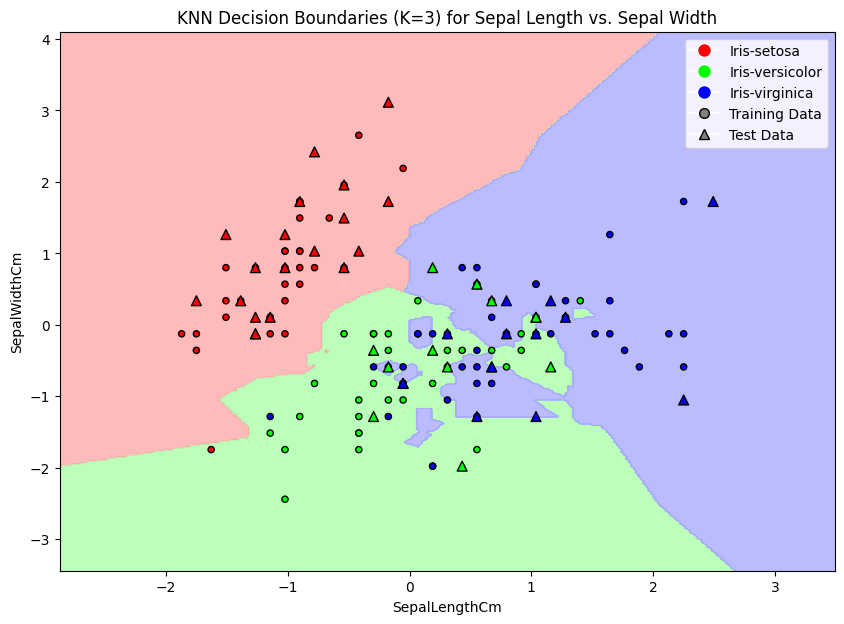

Decision boundaries visualized for the KNN model.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_train_2d, y_train)

class_names = knn_2d.classes_

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

y_train_numerical = np.array([np.where(class_names == label)[0][0] for label in y_train])
y_test_numerical = np.array([np.where(class_names == label)[0][0] for label in y_test])



x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1

x_min = min(x_min, X_test_2d[:, 0].min() - 1)
x_max = max(x_max, X_test_2d[:, 0].max() + 1)
y_min = min(y_min, X_test_2d[:, 1].min() - 1)
y_max = max(y_max, X_test_2d[:, 1].max() + 1)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([np.where(class_names == label)[0][0] for label in Z])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_numerical, cmap=cmap_bold, edgecolor='k', s=20, label='Training Data')

plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_numerical, cmap=cmap_bold, edgecolor='k', s=50, marker='^', label='Test Data')

plt.title(f'KNN Decision Boundaries (K={optimal_k}) for Sepal Length vs. Sepal Width')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

from matplotlib.lines import Line2D
legend_elements = []
for i, name in enumerate(class_names):
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=name, markerfacecolor=cmap_bold(i), markersize=10))
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Training Data', markerfacecolor='grey', markeredgecolor='k', markersize=7))
legend_elements.append(Line2D([0], [0], marker='^', color='w', label='Test Data', markerfacecolor='grey', markeredgecolor='k', markersize=7))

plt.legend(handles=legend_elements, loc='best')
plt.show()
print("Decision boundaries visualized for the KNN model.")